In [25]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from datetime import timezone
import numpy as np
import matplotlib.pyplot as plt

DSI Lab: Task 1

This excercise combines multiple phases of the CRISP-DM from Data Collection to Modelling and Model Evaluation. You should apply your knowledge on all the steps in the
process and also iterate through multiple steps.
The dataset is a collection of environmental sensor data from the H-Building of FH-Aachen.

## 1. Task a & b

Read '07092021bimsim_roomparquet'

In [26]:
path = './datasets/07092021bimsim_roomparquet'
df = pd.read_parquet(path)
print(df.head(10))
print(df.info())


             source               datetime            id    celsius  pressure   
0  0013A20041A94BE7  2021-03-21 01:46:22.0  1.616288e+09  18.772852  969.5412  \
1  0013A20041A94BE7  2021-03-21 01:51:24.0  1.616288e+09  18.772852  969.5412   
2  0013A20041A94BE7  2021-03-21 01:56:27.0  1.616288e+09  18.767773  969.4889   
3  0013A20041A94BE7  2021-03-21 02:01:29.0  1.616288e+09  18.747656  969.5412   
4  0013A20041A94BE7  2021-03-21 02:06:31.0  1.616289e+09  18.742579  969.4889   
5  0013A20041A94BE7  2021-03-21 02:11:33.0  1.616289e+09  18.747656  969.4627   
6  0013A20041A94BE7  2021-03-21 02:16:35.0  1.616289e+09  18.737500  969.4627   
7  0013A20041A94BE7  2021-03-21 02:21:37.0  1.616290e+09  18.727540  969.4365   
8  0013A20041A94BE7  2021-03-21 02:26:39.0  1.616290e+09  18.717382  969.4365   
9  0013A20041A94BE7  2021-03-21 02:31:41.0  1.616290e+09  18.712500  969.3319   

    humidity            sensor  room  
0  33.374760  0013A20041A94BE7  H203  
1  33.369170  0013A20041A94BE7

Convert date columns ('id'=unix-ts, 'datetime'=string)

In [27]:
df['datetime_converted'] = pd.to_datetime(df['datetime'])
df['id_converted'] = pd.to_datetime(df['id'], unit='s')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625329 entries, 0 to 1625328
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   source              1625329 non-null  object        
 1   datetime            1625329 non-null  object        
 2   id                  1625329 non-null  float64       
 3   celsius             1625329 non-null  float64       
 4   pressure            1625329 non-null  float64       
 5   humidity            1625329 non-null  float64       
 6   sensor              1625329 non-null  object        
 7   room                1619653 non-null  object        
 8   datetime_converted  1625329 non-null  datetime64[ns]
 9   id_converted        1625329 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 124.0+ MB
None
                 id       celsius      pressure      humidity   
count  1.625329e+06  1.625329e+06  1.625329e+06 

## 2. Task c

Compare the timestamps in the two respective columns. What is their difference?
Could this be relevant? (Hint: Consider the capturing process)


In [28]:
dfd = df[['datetime','id_converted','datetime_converted']]
print(dfd.head(10))
print(df['datetime_converted'].tail(5))
print(df['id_converted'].tail(5))

                datetime                  id_converted  datetime_converted
0  2021-03-21 01:46:22.0 2021-03-21 00:46:22.876011520 2021-03-21 01:46:22
1  2021-03-21 01:51:24.0 2021-03-21 00:51:24.948136192 2021-03-21 01:51:24
2  2021-03-21 01:56:27.0 2021-03-21 00:56:27.080546816 2021-03-21 01:56:27
3  2021-03-21 02:01:29.0 2021-03-21 01:01:29.167299584 2021-03-21 02:01:29
4  2021-03-21 02:06:31.0 2021-03-21 01:06:31.207941888 2021-03-21 02:06:31
5  2021-03-21 02:11:33.0 2021-03-21 01:11:33.243678208 2021-03-21 02:11:33
6  2021-03-21 02:16:35.0 2021-03-21 01:16:35.274406400 2021-03-21 02:16:35
7  2021-03-21 02:21:37.0 2021-03-21 01:21:37.302532864 2021-03-21 02:21:37
8  2021-03-21 02:26:39.0 2021-03-21 01:26:39.294675456 2021-03-21 02:26:39
9  2021-03-21 02:31:41.0 2021-03-21 01:31:41.327459840 2021-03-21 02:31:41
1625324   2021-09-07 01:34:47
1625325   2021-09-07 01:39:51
1625326   2021-09-07 01:44:55
1625327   2021-09-07 01:49:59
1625328   2021-09-07 01:55:03
Name: datetime_converted,

It seems like 'datetime' is equal to 'id' with an offset of +1 hour. 'id' is coded as unix-timestamp and has more time information then datetime, in case one of the columns should be dropped, its better to kick out the one with less information. But there are timestamps, where the difference is bigger then one hour. So 'id' does not 100% relate to 'datetime'.

## 3. Task d

Are there columns that can be safely dropped for the following steps?


In [29]:
# Either 'sensor' or 'source' might be dropped, aslong as there values stay equal
print('Drop source: ' + str(df['sensor'].equals(df['source'])))

def sensorFitsRoom():
    df_sensor_room = df[['sensor','room']]
    unique_sensors = df['sensor'].unique()
    # print(unique_sensors)
    for sensor in unique_sensors:
        result =  df_sensor_room.loc[df['sensor'] == sensor]
        if result['room'].unique().size > 1:
            return False
    return True

# 'room' might be dropped, if there is only a one-to-one connection between sensor and room
print('Drop room: ' + str(sensorFitsRoom()))

def datetimeEqualsId():
    id_converted = df['id_converted'].dt.floor(freq='s')
    pd.to_datetime(df['id'], unit='s')
    datetime_shifted = df['datetime_converted'] - pd.Timedelta(hours=1)
    return id_converted.equals(datetime_shifted)

# 'datetime' might be dropped, if it equals 'id'
print('Drop datetime: ' + str(datetimeEqualsId()))

Drop source: True
Drop room: True
Drop datetime: False


## 4. Task e

Are there outliers in the data?


           celsius     pressure     humidity
count  1.62533e+06  1.62533e+06  1.62533e+06
mean       21.2777      957.012      34.1079
std        4.52626      10.4166      6.32062
min       -149.528      872.627      13.6242
25%        19.5039      949.741      29.2585
50%        21.2199      957.261      33.1892
75%        23.0467      964.445      38.5683
max        38.8836      1034.92      97.0518


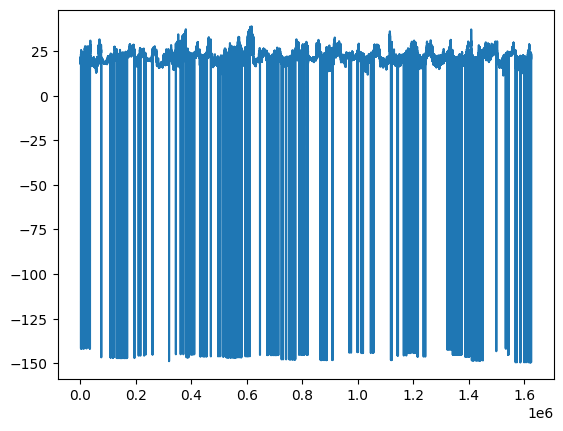

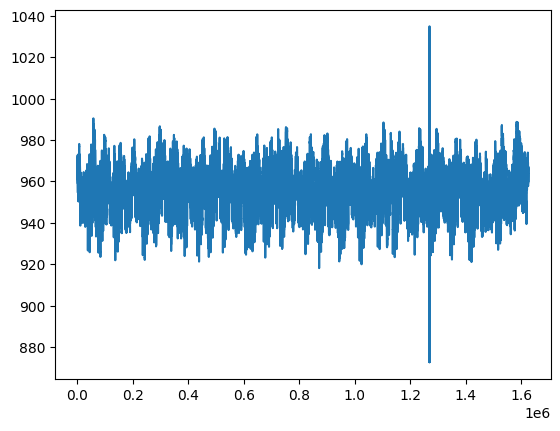

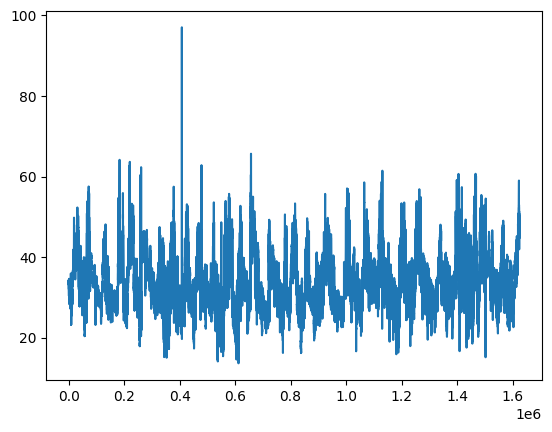

In [30]:
values = df[['celsius','pressure','humidity']]
print(values.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))) # https://stackoverflow.com/a/47207283

plt.plot(df['celsius'])
plt.show()

plt.plot(df['pressure'])
plt.show()

plt.plot(df['humidity'])
plt.show()

The minimum 'celsius' is '-149.528' whereas the mean is '21.2777'. We know that the data is from sensors in rooms. So we could be sure, that negative temperature values are outliers. Also is the maximum 'humidity' at '97.0518' percent. This is also quite high for a room. Even when its closed.
The plot also show, that there are some outliers in 'pressure' and 'humidity'.

## 5. Task f,g

Group the data roomwise and print some statistics!
Create line plots for the rooms using plotly!

ValueError: Input could not be cast to an at-least-1D NumPy array

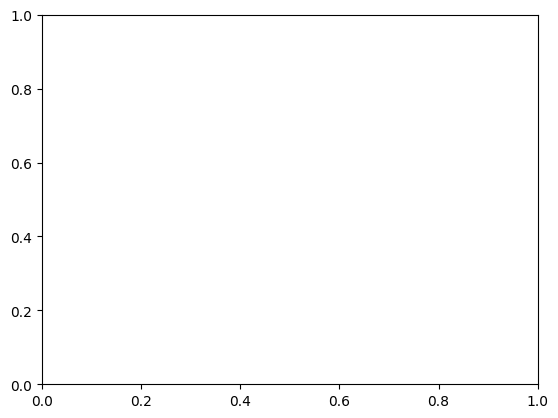

In [32]:
df.groupby(by='room').describe()
plt.plot(df.groupby(by='room'))